<u><h2>The data files</h2></u>
<ul>
  <li>The data are presented as header-less (numeric data only without any descriptive text) in ASCII format.</li>
  <li>The file has two columns of integer values, separated by a space.</li>
  <li>The links for the data are given below. Pick any one to work on initially.</li>
  <ul>
  <li><a href="https://drive.google.com/file/d/0B71z6CTGT4maSG5XTndHbXVHTWM/view?usp=sharing_eil&ts=58a78222" target="_blank">Data file 1</a></li>
  <li><a href="https://drive.google.com/file/d/0B71z6CTGT4maQm90Y2NHcHRUNlU/view?usp=sharing_eil&ts=58a78222" target="_blank">Data file 2</a></li>
  <li><a href="https://drive.google.com/file/d/0B71z6CTGT4maU2JUY18yWFM2SU0/view?usp=sharing_eil&ts=58a78222" target="_blank">Data file 3</a></li>
  <li><a href="https://drive.google.com/file/d/0B71z6CTGT4maVURwRk5BaUZJYmM/view?usp=sharing_eil&ts=58a78222" target="_blank">Data file 4</a></li>
  <li><a href="https://drive.google.com/file/d/0B71z6CTGT4maQzc5RnJjd1FzNzQ/view?usp=sharing_eil&ts=58a78222" target="_blank">Data file 5</a></li>
  </ul>
</ul>


<u><h3>Description of the data:</h3></u>
<ul>
  <li>Voltage time series from the Ooty Radio Telescope (ORT) &mdash; North and South apertures</li>
  <li>As raw voltages, the data are in arbitrary units</li>
  <li>The observation frequency is $326.5\pm8.25$ MHz which has been down-converted to the base band. The voltages hence occupy the $0-16.5$ MHz band.</li>
  <li>The data is sampled at the Nyquist rate, i.e., two real valued voltage measurements in a period corresponding to the maximum variability time-scale (maximum frequency). The time-resolution is, $$dt = \left(\frac{1}{2}\frac{1}{16.5 \text{MHz}}\right)\text{seconds}$$ </li>
  <li>The length of the data is about 1 second</li>
</ul>


We encourage you to explore the data on you own but here are a few ideas to guide you:
<u><h3>A few goals to get you started with this activity</h3></u>
<ul>
  <li>Visulaize the voltage time-series</li>
  <li>Plot and characterize the distribution of the telescope voltage data</li>
  <li>Visulaize the power time-series</li>
  <li>Plot and characterize the distribution fo the power values</li>
  <li>Power Spectral Density: obtain the distribution of power in various frequency bins</li>
  <li>Dynamic spectrum: visualize the change in power spectral density as a function of time</li>
</ul>

<h3>Preliminaries</h3>
<p>This notebook assumes that the code is being executed on Google Colab using a hosted runtime. You are free to use a local editor and runtime or a different programming language altogether as you see fit.</p>
<ul>
  <li>Import necessary libraries</li>
  <li>Access and load the data file</li>
</ul>

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<h4>Import libraries</h4>

In [1]:
# General libraries for easy data manipulation
import os  
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
# Scientific computing libraries
import scipy.constants as scp
import astropy.constants as asc
from sklearn.preprocessing import normalize
# Plotting libraries and methods
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#<< Import more libraries as needed >>

<h4>Access data from Google drive and load to notebook</h4>
<p>The code in the cell below allows you to access a file saved in the Google drive. You need to simply do two things to make it work:</p>
1. Enter the 'file_id'. This is an alpha-numeric string obtained from the sharing link of the data file. If the sharing link looks something like: https://drive.google.com/file/d/0B71z6CTGT4maU2JUY18yWFM2SU0/view?usp=sharing, file_id is the part between "d/" and "/view".</br>
2. Run the cell, click on the authentication link generated by the cell, sign-in with your Gmail account, copy the code generated in the next page, and enter it in the field provided below the cell to allow file access


In [2]:
col_name=['AN','AS']
volts=pd.read_csv("ch00_B0833-45_20150612_191438_010_1",sep=' ',names=col_name)#first data file in the above list
volts.shape

(30720000, 2)

In [3]:
t=pd.timedelta_range(0,periods=30720000,freq='30N')

In [4]:
volts['time']=t

<h3>Section 1: The voltage time series</h3>

<h4>1.1: Plot the voltages from North and South antennas as a function of time</h4>

<ul>
  <li>A simple matplotlib <a href="https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html" target="_blank">line</a> plot may be sufficient to visualize the time-series.</li>
  <li>Use libraries such as Seaborn or Bokeh for aesthetics</li>
  <li>Plot a small part of the time series too to zoom in on the variability time-scale</li>
</ul>

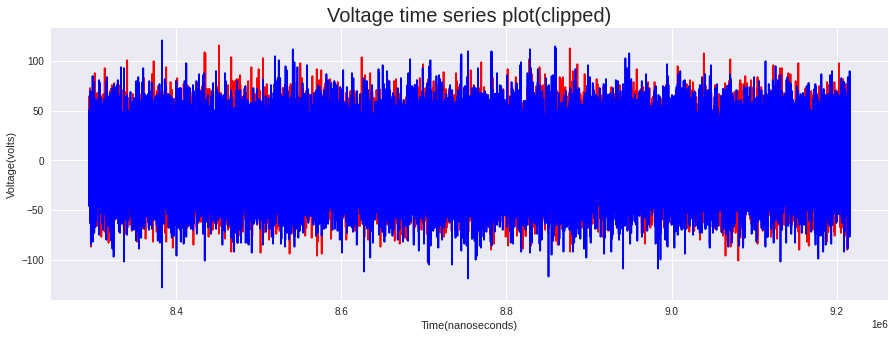

In [5]:
# Plotting code for voltage time-series
plt.figure(figsize=[15,5])
plt.plot(volts['time'][(9*30720):((9+1)*30720)],volts.AN[(9*30720):((9+1)*30720)],color='Red')
plt.plot(volts['time'][(9*30720):((9+1)*30720)],volts['AS'][(9*30720):((9+1)*30720)],color='Blue')
plt.xlabel('Time(nanoseconds)')
plt.ylabel('Voltage(volts)')
plt.title('Voltage time series plot(clipped)',fontdict={'fontsize':20})
plt.savefig('voltage_timeseries(clipped).png')
plt.show()



<h4>1.2: Plot the voltage histograms for the two antennas</h4> 
<ul>
  <li>Use matplotlib <a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html" target="_blank">plt.hist</a> for plotting histograms (<a href="https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/" target="_target">Example</a>)</li>
  <li>Obtain distribution parameters using numpy methods for <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html" target="_target">mean</a> and <a href="https://numpy.org/doc/stable/reference/generated/numpy.std.html" target="_target">standard deviation</a></li>
  <li>Try plotting the probability density function from the measured distribution parameters</li>
  <li>Reference: <a href="https://www.cv.nrao.edu/~sransom/web/A2.html#S5" target="_blank">https://www.cv.nrao.edu/~sransom/web/A2.html#S5</a></li>
</ul>

In [6]:
meanAN=np.mean(volts.AN)
meanAS=np.mean(volts.AS)
stdAN=np.std(volts.AN)
stdAS=np.std(volts.AS)
print(meanAN,meanAS,stdAN,stdAS)
volts['AN_centerd']=volts.AN-meanAN
volts['AS_centerd']=volts.AS-meanAS

3.49682841796875 0.74936201171875 28.024741901148076 29.856592006294704


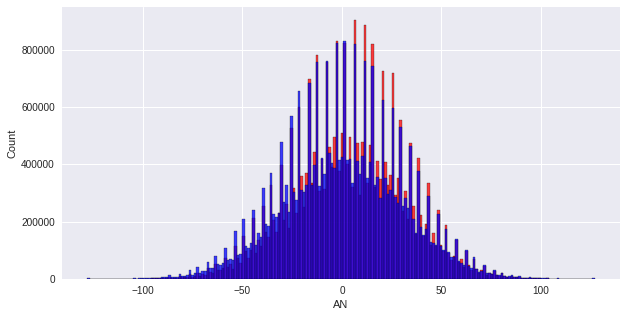

In [7]:
# Plotting code for voltage distribution
plt.figure(figsize=[10,5])
sns.histplot(x=volts.AN,bins=200, color='red')
sns.histplot(x=volts.AS,bins=200, color='Blue')
plt.savefig('histogram.png')
plt.show()

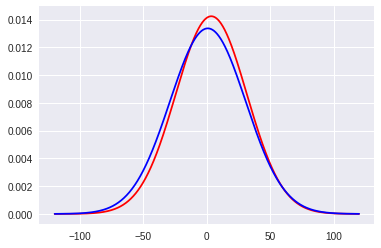

In [8]:
Xaxis=np.linspace(start=-120,stop=120,num=1000)
pdfAN=stats.norm.pdf(Xaxis, meanAN,stdAN)
plt.plot(Xaxis,pdfAN,color='red')
pdfAS=stats.norm.pdf(Xaxis, meanAS,stdAS)
plt.plot(Xaxis,pdfAS,color='Blue')
plt.show()

<h3>Section 2: The power time series</h3>

<h4>2.1: Plot the power from North and South antennas as a function of time</h4>

<ul>
  <li>The power is obtained by squaring the voltages (use <a href="https://numpy.org/doc/stable/reference/generated/numpy.square.html" target="_blank">numpy square</a>)</li>
  <li>A simple matplotlib <a href="https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html" target="_blank">line</a> plot may be sufficient to visualize the time-series.</li>
  <li>Plot a small part of the time series too to zoom in on the variability time-scale</li>
</ul>

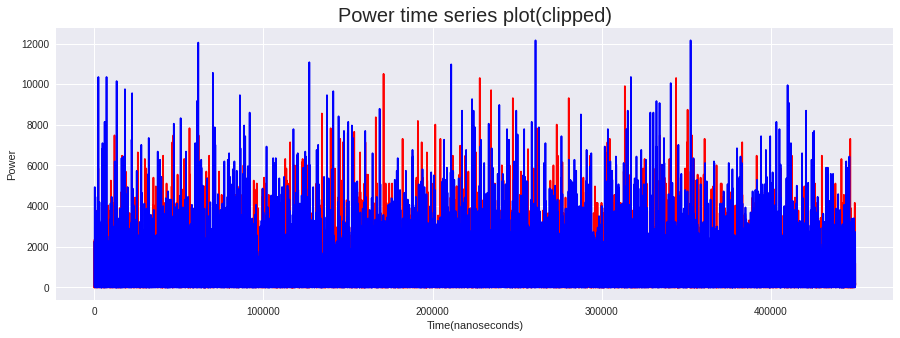

In [9]:
# Plotting code for power time-series
volts['PowerAN']=np.square(volts.AN_centerd)
volts['PowerAS']=np.square(volts.AS_centerd)

plt.figure(figsize=[15,5])
plt.plot(volts['time'][0:15000],volts['PowerAN'][0:15000],color='Red')
plt.xlabel('Time(nanoseconds)')
plt.ylabel('Power')
plt.title('Power time series plot(clipped)',fontdict={'fontsize':20})
plt.plot(volts['time'][0:15000],volts['PowerAS'][0:15000],color='Blue')
#plt.savefig('AN_timeseries(clipped).png')
plt.show()

<h4>2.2: Plot the power histograms for the two antennas</h4> 
<ul>
  <li>Use matplotlib <a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html" target="_blank">plt.hist</a> for plotting histograms (<a href="https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/" target="_target">Example</a>)</li>
  <li>Plot the appropriate probability distribution function and find it's spread (<a href="https://www.cv.nrao.edu/~sransom/web/A2.html#S6" target="_blank">https://www.cv.nrao.edu/~sransom/web/A2.html#S6</a>)</li>
</ul>

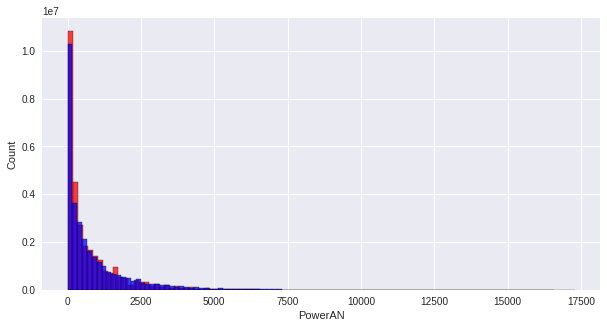

In [10]:
# Plotting code for power distribution
plt.figure(figsize=[10,5])
sns.histplot(x=volts.PowerAN,bins=100, color='red')
sns.histplot(x=volts.PowerAS,bins=100, color='Blue')
plt.savefig('histogram.png')
plt.show()

In [11]:
meanPAN=np.mean(volts.PowerAN)
meanPAS=np.mean(volts.PowerAS)
stdPAN=np.std(volts.PowerAN)
stdPAS=np.std(volts.PowerAS)
print(meanPAN,meanPAS,stdPAN,stdPAS)

785.3861586259646 891.4160862303409 1104.9727481267194 1261.9660488196648


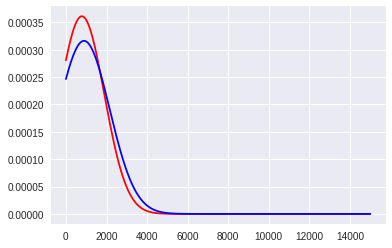

In [12]:
Xaxis=np.linspace(start=0,stop=15000,num=1000)
pdfPAN=stats.norm.pdf(Xaxis, meanPAN,stdPAN)
plt.plot(Xaxis,pdfPAN,color='red')
pdfPAS=stats.norm.pdf(Xaxis, meanPAS,stdPAS)
plt.plot(Xaxis,pdfPAS,color='Blue')
plt.show()


<h3>Section 3: The Dynamic Spectrum</h3>
<ul>
  <li>Obtain the contribution of various frequencies that produce the voltage time-series &mdash; using a Fast Fourier Transform (FFT)</li>
  <li>A Fourier transform consists of the contributions from the constituent frequency which can be squared to give the power distribution</li>
  <li>Sequences of power spectra can be combined and added to reduce the statistical uncertainties</li>
  <li>A time-ordered series of spectra is referred to as the <em>Dynamic Spectrum</em></li>
</ul>

<h4>3.1: Choose frequency and time binning parameters</h4>
<ul>
  <li>First we want to obtain the spectral composition of the time series. In order to find the spectral information, we select a small part of the time-series, take the Fourier series to convert it to the spectrum in that time range.</li>
  <li>The spectral information is obtained at the cost of time resolution (since FFT of voltage time samples gives the spectrum)</li>
  <li>For time-resolution $dt$, an $N-$point FFT will output the amplitude and phase of $N/2$ frequencies that contains information equivalent to the time-series</li>
  <li>The data can now be transformed to a time series of time bin-size $N\times dt$ but with a $N/2$-bins spectrum in each time bin</li>
  <li>The power spectral distribution is obtained by squaring the Fourier spectrum</li>
</ul>

In [7]:
# Frequency and time binning parameters
#Nf =  # Number of frequency bins; Choose a power of 2: 2^n (E.g., 64, 128, 256)
#print('Chosen number of frequency bins = {0}'.format(Nf))'''
fmax = 16.5*10**6 # Equals the bandwidth upper-limit of 16.5 MHz
print('Total bandwidth of signal = {0:.1f} MHz'.format(fmax/1e6))
dt = 1/(2*fmax) # Time resolution of 1/(33 MHz) seconds
print('Time-resolution of voltage sampling = {0:.2f} nanosecond'.format(dt*1e9))
# For chosen frequency resolution,
#print('----------FFT length-----------') # FFT - Fast Fourier Transform
#df =  # Lowest frequency probed is equal to the chosen frequency resolution (Bandwidth by number of frequency bins)
#print('Lowest frequency probed = {0:.2f} kHz'.format(df/1000))
#Tmax =   # Largest time-scale of variability probed is the inverse of the lowest frequency of interest
#print('Largest time-scale of variability = {0:.2f} microseconds'.format(Tmax*1e6))
#Nfft =   # Number of voltage samples to obtain FFT is the number of voltage samples that span the largest time-scale (of interest / probed)
#print('Number of voltage samples to obtain FFT = {0:d}'.format(Nfft))
#Nspectra =  # The spectral time series has a factor of 'Nfft' less time bins than the voltage data
#print('Number of spectra obtained through the {0}-point FFT = {1}'.format(Nfft, Nspectra))
#print('Time-resolution of the spectral series = {0:.2f} microsecond'.format(Nfft*dt*1e6))'''

Total bandwidth of signal = 16.5 MHz
Time-resolution of voltage sampling = 30.30 nanosecond


<p>Consecutive spectra can be co-added in batches to reduce the statistical uncertainty in the power values and reduce the spectral array to a manageable size. This comes at the cost of time-resolution.</p>
(Do ensure that the final time-resolution is still at most 1 ms.)

In [ ]:
#print('----------Time rebinning-----------')
#Nint =  # Choose the number of consecutive spectral samples to be added
#print('Number of spectra to add = {0}'.format(Nint))
#print('Time-resolution of the co-added time series = {0} micro-second'.format(Nint*Nfft*dt*1e6))
#print("Binned time-series has resolution > 1 ms. Choose a smaller number of spectra to average.") if (Nint*Nfft*dt*1e6 > 1000) else print("Binned time-series has resolution <= 1 ms")

<h4>3.2: Convert voltage time-series to dynamic spectrum (spectral time-series)</h4>
<ul>
  <li>Re-group the voltage time-series into sections of <em>Nfft</em> points each</li>
  <li>Take the Fourier transform of every section of the time-series containting <em>Nfft</em> points</li>
  <li>Convert to power by taking the absolute value square of the complex spectral amplitudes</li>
  <li>Obtain the total power for the <em>Nint</em> spectral samples</li>
</ul>

<p>A simple way of grouping within an array and applying commands to the groups is using numpy method <a href="https://numpy.org/doc/stable/reference/generated/numpy.reshape.html" target="_blank">np.reshape</a> followed by the operation one intends to perform, <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html" target="_blank">np.fft.rfft</a> (for real-valued time-series) in our case.</p> The list of frequencies can be obtained using the <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.rfftfreq.html" target="_blank">np.fft.rfftfreq</a> method.
<p>Follow-up the FFT with taking the absolute value (<a href="https://numpy.org/doc/stable/reference/generated/numpy.absolute.html" target="_blank">np.abs</a>) of the complex amplitudes and squaring them (<a href="https://numpy.org/doc/stable/reference/generated/numpy.square.html" target="_blank">np.square</a>).</p>

In [8]:
# Code here #
ANvolts=np.array(volts.AN_centerd)
ASvolts=np.array(volts.AS_centerd)
volt=ANvolts
Nfft=256
Nvolts=len(volt)
print("North Antenna voltage array shape:",ANvolts.shape)

# Reshare the voltage time-series to prepare it for taking the N-point Fourier transform
dim1=Nvolts//Nfft
volts_re=np.reshape(volt, (dim1,Nfft))
print("Reshaped array:",volts_re.shape)

# Obtain the Fourier transform and the frequency list
volts_fft=np.fft.rfft(volts_re)
n=volts_re.shape[1]

# Calculate the absolute value squared for the FFT output to obtain the power spectral density
Power_spectra= np.square(np.absolute(volts_fft))

# Add Nint set of consecutive spectra to obtain the final dynamic spectrum
Nint=129
Power_spec_cons=np.empty([dim1//Nint,volts_fft.shape[1]])
for i in range(0,dim1//Nint):
    var=0
    for j in range(0,Nint):
        var += Power_spectra[j+(i*Nint)]
    Power_spec_cons[i]=var/Nint
print("Final Power Spectra:",Power_spec_cons.shape)

North Antenna voltage array shape: (30720000,)
Reshaped array: (120000, 256)
Final Power Spectra: (930, 129)


<h4>3.3: Plot the dynamic spectrum</h4>
<p>Use either <a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html" target="_blank">plt.imshow</a> or <a href="https://www.geeksforgeeks.org/matplotlib-pyplot-pcolormesh-in-python/?ref=lbp" target="_blank">plt.pcolormesh</a> to plot the dynamic spectrum.</p>
<p>Make sure that you label the time and frequency axes appropriately</p>
<p>Caution: <em>imshow</em> and <em>pcolormesh</em> use different locations for the origin in the plot, see <a href="https://thomas-cokelaer.info/blog/2014/05/matplotlib-difference-between-pcolor-pcolormesh-and-imshow/" target="_blank">this post</a>.

In [9]:
(928800/(930))*1e-6


0.0009987096774193547

In [10]:
# Plotting the dynamic spectrum here #
timeplt=np.arange(0,928800*1e-6,(928800/(Power_spec_cons.shape[0]))*1e-6)*1e3
norm=normalize(Power_spec_cons)
norm_trans=norm.transpose()
volts_freq=(np.fft.rfftfreq(n,d=dt)+318.25*1e6)/1e6
volts_freq=sorted(volts_freq,reverse=True)

In [11]:
np.shape(volts_freq),np.shape(timeplt),np.shape(norm_trans)

((129,), (930,), (129, 930))

/home/vysakh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


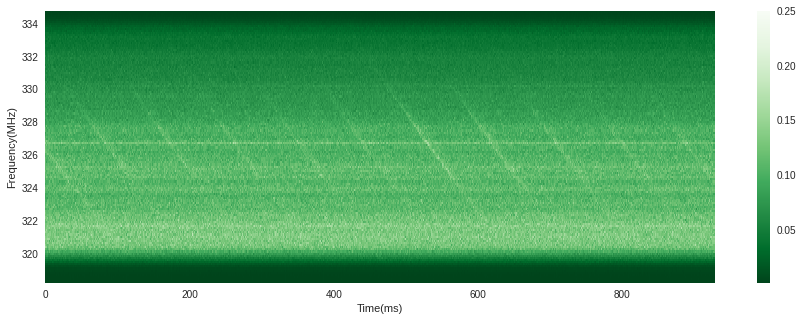

In [12]:
plt.figure(figsize=[15,5])
plt.pcolormesh(timeplt,volts_freq,norm_trans, cmap='Greens_r',vmax=0.25)
plt.colorbar()


plt.xlabel('Time(ms)')
plt.ylabel('Frequency(MHz)')
plt.savefig('Spectra.png')


<h4>3.4: The Power Spectral Density</h4>
<p>The power spectral density of the entire data can be visualized by averaging the spectra over the entire time-series</p>


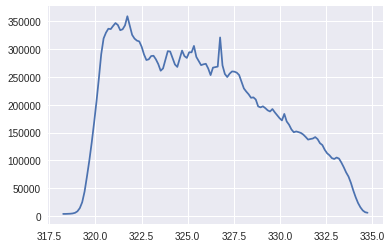

In [15]:
# Use the numpy method 'np.average' on the dynamic spectrum to obtain the average PSD and plot it using the 'plt.line' plotting method.
Power_mean=np.mean(Power_spec_cons,axis=0)
plt.plot(volts_freq,Power_mean)

<mark>**NEW CELL**</mark>
<h4>A few extra checks before you more to the next section.</h4>
<ul>
  <li>A large number of frequency bins (<code>Nf</code>) requires a large time range (<code>Nfft</code>), reducing time-resolution and spreading the power over large number of channels. If the frequency bins are too low, the dispersion smears the signal within the now large frequency bin. So, choose an optimal frequency bin size.</li>
  <li>The data will have gone through the following restructuring:
    <ol>
      <li>Started with a array of voltages of size say <code>Nvolts</code></li>
      <li>To take a FFT of <code>Nfft</code> samples, the voltages data are converted to an array of <code>Nvolts//Nfft</code> rows of <code>Nfft</code> voltages in each row.</li>
      <li>After FFT, you will have obtained a fluctuation spectrum array with <code>Nvolts//Nfft</code> rows of <code>Nfft//2</code> frequency-space amplitudes in each row. This is converted to a power spectral array of the same size.</li>
      <li>Group of <code>Nint</code> consecutive spectra are combined to improve statistics of the power spectra, which reduces the array to <code>Nvolts//Nfft//Nint</code> rows of <code>Nfft//2</code> power spectral values in each row. This is plotted to obtain the dynamic spectrum.</li>
    </ol>
  </li>
  <li>Dynamic spectrum can be obtained with either north or south voltage samples. But for source characterization, combine the two voltages, simultaneous samples from the north and south, and obtain the final dynamic spectrum.</li>
  <li>Make sure the pulsar signal visible in the dynamic spectrum shows the expected dispersion delays at lower frequencies. If the pattern is inverted, a simple flip of the frequencies should fix the data.</li>
</ul>

<u><h2>Source characterization</h2></u>

<h3>General observations from the dynamic spectrum</h3>
<p>The dynamic spectrum provides a good overview of the combined spectral plus temporal behaviour of information in the electrical power received by the Antenna.</p>
<p>What features do you see in the dynamic spectrum?</p>
<ul>
  <li>Is the power distribution uniform in frequency and/or time?</li>
  <li>Any observable periodicities or frequency-dependent delays? Periodic emission ($P\approx \_\_\pm\_$ ms) from a source with systematic delays at  lower frequencies (Time delay $\Delta t\sim\_\_\_$ ms between $\sim\_\_\_-\_\_\_$ MHz range).</li>
  <li>Is the potential source bright in some narrow frequency range?</li>
  <li>Any other observations?</li>
</ul>

<p>We can perform the following analyses on the potential source</p>
<ul>
  <li>De-disperse the signal to compensate for the frequency dependent delays to remove the propagation effects on the signal</li>
  <li>Fold the time-series with the periodicity apparent in the data</li>
  <li>Maximize power concentration in the signal by determining the true period and dispersion correction. The effect of incorrect period and incorrect dispersion correction is always to broaden the power distribution within a period.</li>
</ul>



---

<mark>**ALL NEW CELLS BELOW**</mark>


<h3>Section 1: De-dispersion</h3>

Dispersion due to the interstellar medium could be the source of the frequency-dependent delay in the period signal. The delay of a signal at frequency $\nu$ relative to an infinite-frequency signal emitted at the same time from the souce is
$$t \approx 4.149\times10^3 \left(\frac{\text{DM}}{\text{pc cm}^{-3}}\right)\left(\frac{\nu}{\text{MHz}}\right)^{-2}\;\text{seconds}$$
where, DM is the dispersion meaasure along the line of sight.

Expected DM for a measured time delay $\Delta t$ between two frequencies $\nu_1,\nu_2$,
$$DM \approx \frac{\Delta t}{4.149\times10^3}\left(\frac{1}{\nu_2^2}-\frac{1}{\nu_1^2}\right)^{-1}\text{pc cm}^{-3}$$

<h4>How to correct for dispersion delays?</h4>
<ul>
  <li>The formulas above give (i) the expected time delay between two frequencies for a given DM and (ii) a calculable DM for an observed delay between two frequencies.</li>
  <li><mark>Ensure you use the original observation frequencies not the down-converted base frequencies.</mark></li>
  <li>As apparent from the dynamic spectrum, which can be viewed as a time-series in each frequency bin, the low frequency signals arrive later than their counterparts at higher frequencies. If the time-series in each frequency channel is advanced by the expected delay relative to highest frequency, the signal will get aligned in time. Use the rough delay observed between two frequencies in the dynamic spectrum above to calculate the rough DM and use that to compute delays for each frequency bin.</li>
  <li><a href="https://numpy.org/doc/stable/reference/generated/numpy.roll.html" target="_blank">np.roll</a> can help achieve this task of advancing the time series if you can determine the number of bins by which the time-series needs to be advanced.</li>
</ul>

/home/vysakh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


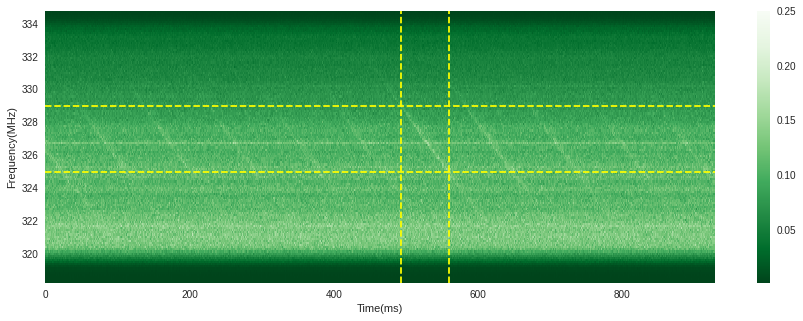

In [16]:
plt.figure(figsize=[15,5])
plt.pcolormesh(timeplt,volts_freq,norm_trans, cmap='Greens_r',vmax=0.25)
plt.colorbar()
plt.axhline(y=329,color='yellow',linestyle='dashed')
plt.axhline(y=325,color='yellow',linestyle='dashed')
#plt.axhline(y=333,color='yellow',linestyle='dashed')

plt.axvline(x=493,color='yellow',linestyle='dashed')
plt.axvline(x=560,color='yellow',linestyle='dashed')
#plt.axvline(x=531,color='yellow',linestyle='dashed')

plt.xlabel('Time(ms)')
plt.ylabel('Frequency(MHz)')
plt.savefig('Spectra.png')

In [17]:
freq1,freq2=329,325
time1,time2=493*1e-3,560*1e-3
DM=((time2-time1)/(4.149*1e3))*((1/(freq2**2))-(1/(freq1**2)))**(-1)
DM

70.57520463600545

In [18]:
# Create an array of observed frequencies in MHz for the frequency bins in your dynamic spectrum array
Freqbins=volts_freq
highFREQ=np.median(volts_freq)
# Determine the relative delays (in seconds) at those frequencies with respect to the highest frequency in the data
tdelay=4.149*1e3*DM*np.power(Freqbins,-2)-4.149*1e3*DM*np.power(highFREQ,-2)

In [19]:
fac=(928800/(Power_spec_cons.shape[0]))*1e-6
print("1 bin : ",fac,"seconds")
print("1 sec : 1/",fac,"bins")
tbins=(np.round(tdelay/fac)).astype(int)


1 bin :  0.0009987096774193547 seconds
1 sec : 1/ 0.0009987096774193547 bins


In [20]:
p=Power_spec_cons.transpose()
p

array([[ 6622.8119381 ,  4921.39570321,  6559.79569042, ...,
         5738.34578655,  4938.20353616,  6168.1794443 ],
       [ 6650.40036731,  7386.2447243 ,  6463.94537618, ...,
         7186.0510084 ,  5523.04593811,  7921.78315808],
       [ 9527.32010013, 10910.57909346,  9924.33023322, ...,
        10322.30170119,  9708.8165234 , 10822.16833552],
       ...,
       [ 5513.16659262,  4405.89450031,  4472.11169261, ...,
         4523.54437276,  4037.14806248,  4188.45375479],
       [ 4794.36152846,  4478.38003591,  4429.31354241, ...,
         4322.72286221,  3929.44482964,  4392.24974296],
       [ 5147.68217054,  4595.99224806,  4133.56589147, ...,
         4731.36434109,  3887.90697674,  3308.84496124]])

In [21]:
def image_shift_roll(img, x_roll):
    img_roll = img.copy()
    img_roll = np.roll(img_roll,-x_roll, axis = 1)     # Positive x rolls right
    return img_roll

In [22]:
for i in range(len(tbins)):
    p[i:(i+1)]=image_shift_roll(p[i:(i+1)],tbins[i])
p

array([[ 7037.45105825,  6718.38912492,  6109.43501368, ...,
         4866.12994546,  5737.20683926,  5184.51058035],
       [ 6289.71631896,  6933.28876849,  7284.27012112, ...,
         5341.60205641,  7610.01033248,  6603.42581088],
       [13569.20265228, 10889.04428469, 10598.49084341, ...,
        10354.96435099, 10416.1455021 ,  9160.74055743],
       ...,
       [ 4059.20982   ,  4372.57128659,  3935.34562589, ...,
         4422.82736227,  4519.29149463,  3733.45382532],
       [ 3695.13762939,  3405.96214843,  3904.57511867, ...,
         3228.75160311,  3378.20259026,  4738.9631522 ],
       [ 4304.5503876 ,  3724.57364341,  4094.34108527, ...,
         4262.52713178,  4053.60465116,  3458.50387597]])

In [23]:
norm2=normalize(p)
norm2

array([[0.03826873, 0.03653371, 0.0332223 , ..., 0.02646137, 0.03119817,
        0.02819268],
       [0.02947689, 0.03249301, 0.03413789, ..., 0.02503353, 0.03566448,
        0.0309471 ],
       [0.04389705, 0.0352266 , 0.03428665, ..., 0.03349883, 0.03369675,
        0.02963546],
       ...,
       [0.0328153 , 0.03534856, 0.03181396, ..., 0.03575484, 0.03653467,
        0.03018184],
       [0.03076505, 0.02835743, 0.03250879, ..., 0.02688201, 0.02812631,
        0.03945576],
       [0.03585233, 0.03102174, 0.03410151, ..., 0.03550232, 0.03376222,
        0.02880566]])

In [24]:
#tdelay=(np.round(tdelay)).astype(int)
# Convert the delays in seconds to number of time bins according to the time-series in your dynamic spectrum data
#norm2=norm
# Shift (advance) the time series in each frequency bin according to the calculated delay above
#for i in range(len(volts_freq)-1):
#    norm2=np.roll(norm2,tdelay[i],axis=0)

/home/vysakh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


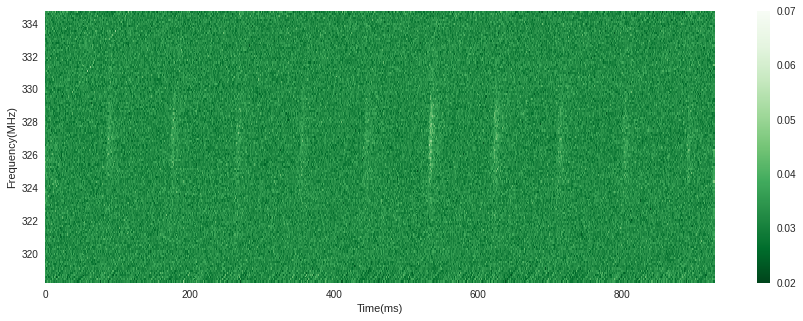

In [57]:
# Plot the de-despersed dynamic spectrum
plt.figure(figsize=[15,5])
plt.pcolormesh(timeplt,volts_freq,norm2, cmap='Greens_r',vmax=0.07)
plt.colorbar()
plt.savefig("Spectra_dedis.png")
plt.xlabel('Time(ms)')
plt.ylabel('Frequency(MHz)')
plt.savefig('Spectra.png')

In [51]:
Power_spectra_dedis=p

In [52]:
IOF_spectra=np.sum(Power_spectra_dedis,axis=0)


Approx Time Period :  92 ms


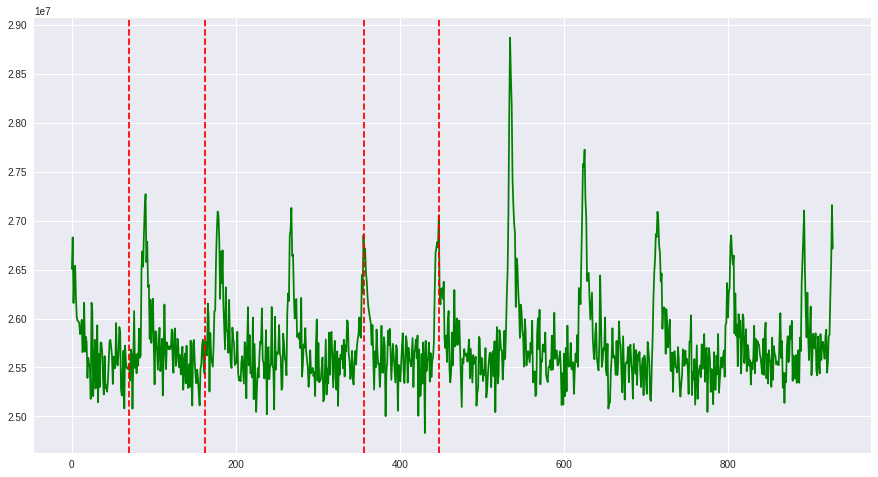

In [53]:
plt.figure(figsize=[15,8])
plt.plot(timeplt,IOF_spectra,color='Green')
plt.savefig("IOF_spectra.png")
plt.axvline(x=356,color='red',linestyle='dashed')
plt.axvline(x=448,color='red',linestyle='dashed')
plt.axvline(x=70,color='red',linestyle='dashed')
plt.axvline(x=162,color='red',linestyle='dashed')

timep=(448-356)
print("Approx Time Period : ", timep,"ms")

(90,) (90,)


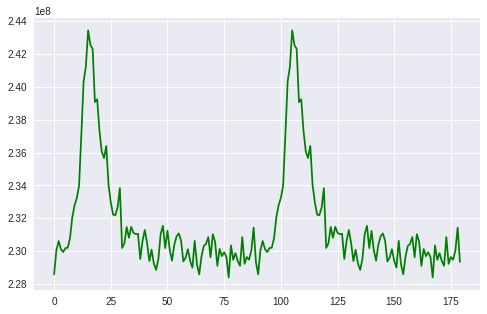

In [54]:
timep=90
s=timep+71
foldd_sig=IOF_spectra[70:(timep+70)]
print(foldd_sig.shape,IOF_spectra[s:s+timep].shape)
for i in range(50):
    
    if (s+timep)>900:
        break
    foldd_sig=np.add(IOF_spectra[s:s+timep],foldd_sig)
    s=s+timep
timex=np.arange(0,(timep*1e-3)*2,((timep*1e-3)/len(foldd_sig)))
foldd_sig_mod=np.append(foldd_sig,foldd_sig)
plt.figure(figsize=[8,5])
plt.plot(timex*1e3,foldd_sig_mod,color='Green')


25187337035818.52

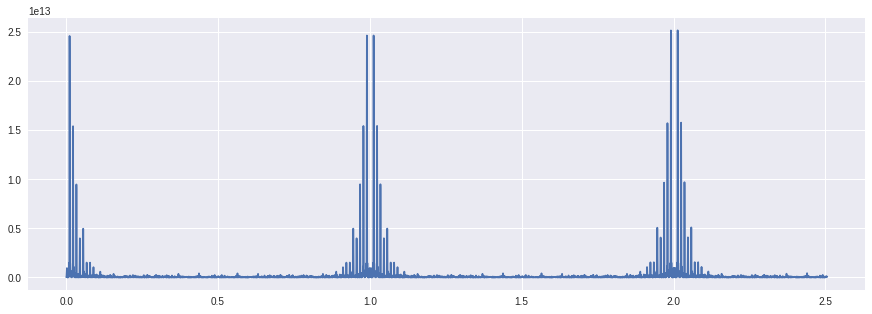

In [146]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(timeplt, IOF_spectra,normalization='psd').autopower()
plt.figure(figsize=[15,5])
display(power.max())
plt.plot(frequency, power)   

In [90]:
frequency.unit


AttributeError: 'numpy.ndarray' object has no attribute 'unit'

<h3>Section 2: Folding in time</h3>
Since the signal is repeated in time, a rough period can be measured from the dynamic spectrum and the whole time-series can be folded at that period to get an intergrated pulse profile.

In [ ]:
# Fold the time-series above with the approximate period observed

# Plot the integrated pulse profile
